# 1. General Data Preparation I

Tasks to perform:  

1.1. Filter songs in Singapore Market  
1.2. Get relevant features  
1.3. Remove outliers, duplicates and missing values  
1.4. Filter non-foreign genres

In [21]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
global_songs_df = pd.read_csv('Data/spotify_global_0.csv')
global_songs_df.info()

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [23]:
# get only SG market
sg_songs_df = global_songs_df[global_songs_df.Country=='Singapore']
sg_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 37 to 164860
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 4.2+ MB


In [24]:
# define columns to keep
keep_cols = [
 'Uri',
 'Popularity',
 'Title',
 'Artist',
 'Album/Single',
 'Genre',
 'Artist_followers',
 'Explicit',
 'Album',
 'Release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'Genre_new',
 'Days_since_release',
 'Top50_dummy']

In [25]:
# get only relevant columns
sg_songs_df = sg_songs_df[keep_cols]

# case normalize col names
sg_songs_df.columns = map(str.lower, sg_songs_df.columns)

# rename cols
renamed_cols_map = {col: col.split('_')[0] for col in keep_cols if 'norm2' in col}
renamed_cols_map.update({
    'acoustics': 'acousticness',
    'liveliness': 'liveness',
    'uri': 'song_id'
})

sg_songs_df = sg_songs_df.rename(columns=renamed_cols_map)
sg_songs_df.columns

Index(['song_id', 'popularity', 'title', 'artist', 'album/single', 'genre',
       'artist_followers', 'explicit', 'album', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre_new', 'days_since_release', 'top50_dummy'],
      dtype='object')

In [26]:
# extract song_id from uri
sg_songs_df['song_id'] = sg_songs_df['song_id'].str.split('/').apply(lambda x:x[-1])
print(sg_songs_df.song_id.head(1))

sg_songs_df.info()

37    5xhJmd0I15jFcEdqxfCzKk
Name: song_id, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 37 to 164860
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             3623 non-null   object 
 1   popularity          3623 non-null   float64
 2   title               3623 non-null   object 
 3   artist              3623 non-null   object 
 4   album/single        3623 non-null   object 
 5   genre               3623 non-null   object 
 6   artist_followers    3622 non-null   object 
 7   explicit            3623 non-null   object 
 8   album               3623 non-null   object 
 9   release_date        3623 non-null   object 
 10  danceability        3623 non-null   object 
 11  energy              3623 non-null   object 
 12  key                 3623 non-null   object 
 13  loudness            3623 non-null   object 
 14  mode                3623 non-null   object 

In [27]:
# find fields with missing values
na_cols = sg_songs_df.columns[sg_songs_df.isna().any()]
na_cols

Index(['artist_followers', 'days_since_release'], dtype='object')

In [28]:
# omit missing values
sg_songs_df = sg_songs_df.dropna(subset=na_cols)
sg_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3559 entries, 37 to 164860
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             3559 non-null   object 
 1   popularity          3559 non-null   float64
 2   title               3559 non-null   object 
 3   artist              3559 non-null   object 
 4   album/single        3559 non-null   object 
 5   genre               3559 non-null   object 
 6   artist_followers    3559 non-null   object 
 7   explicit            3559 non-null   object 
 8   album               3559 non-null   object 
 9   release_date        3559 non-null   object 
 10  danceability        3559 non-null   object 
 11  energy              3559 non-null   object 
 12  key                 3559 non-null   object 
 13  loudness            3559 non-null   object 
 14  mode                3559 non-null   object 
 15  speechiness         3559 non-null   object 
 16  aco

In [29]:
# type cast cols

# cast cols to numeric 
numeric_cols = ['artist_followers', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
sg_songs_df[numeric_cols] = sg_songs_df[numeric_cols].apply(pd.to_numeric)

# map explicit to 0/1
sg_songs_df['explicit'] = np.where(sg_songs_df['explicit']=='True', 1, 0)

# release date to date time
sg_songs_df['release_date'] = pd.to_datetime(sg_songs_df['release_date'])

# additional cols
sg_songs_df = sg_songs_df.astype({
    'title': 'str',
    'artist': 'str',
    'artist_followers': 'int64',
    'days_since_release': 'int64',
})
    
sg_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3559 entries, 37 to 164860
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   song_id             3559 non-null   object        
 1   popularity          3559 non-null   float64       
 2   title               3559 non-null   object        
 3   artist              3559 non-null   object        
 4   album/single        3559 non-null   object        
 5   genre               3559 non-null   object        
 6   artist_followers    3559 non-null   int64         
 7   explicit            3559 non-null   int32         
 8   album               3559 non-null   object        
 9   release_date        3559 non-null   datetime64[ns]
 10  danceability        3559 non-null   float64       
 11  energy              3559 non-null   float64       
 12  key                 3559 non-null   int64         
 13  loudness            3559 non-null   float64  

In [30]:
# check for duplicates

duplicates_df = sg_songs_df[sg_songs_df.sort_values('popularity', ascending=False)\
                .duplicated(subset=['title', 'artist'], keep='last')]\
                .sort_values(by='title')

sg_songs_df = sg_songs_df[~sg_songs_df['song_id'].isin(duplicates_df['song_id'])]
sg_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3184 entries, 37 to 164860
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   song_id             3184 non-null   object        
 1   popularity          3184 non-null   float64       
 2   title               3184 non-null   object        
 3   artist              3184 non-null   object        
 4   album/single        3184 non-null   object        
 5   genre               3184 non-null   object        
 6   artist_followers    3184 non-null   int64         
 7   explicit            3184 non-null   int32         
 8   album               3184 non-null   object        
 9   release_date        3184 non-null   datetime64[ns]
 10  danceability        3184 non-null   float64       
 11  energy              3184 non-null   float64       
 12  key                 3184 non-null   int64         
 13  loudness            3184 non-null   float64  

<ipython-input-30-fb32f369857a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_df = sg_songs_df[sg_songs_df.sort_values('popularity', ascending=False)\


In [31]:
# check for outliers
from scipy import stats

nan_cols = sg_songs_df.columns[sg_songs_df.isna().any()].tolist()
check_cols = sg_songs_df.select_dtypes(include=np.number).columns.tolist()
check_cols = [col for col in check_cols if col not in nan_cols]

sg_songs_df = sg_songs_df[(np.abs(stats.zscore(sg_songs_df[check_cols])) < 3).all(axis=1)]
sg_songs_df.shape

(2631, 26)

In [32]:
# explore genres

genre_count_df = sg_songs_df.genre.value_counts() \
                            .reset_index().\
                            rename(columns={
                                'index':'genre',
                                'genre':'count'}
                                )
genre_count_df

genre  count
0                   dance pop    605
1                       k-pop    443
2                         pop    161
3                    big room     82
4                    mandopop     70
..                        ...    ...
180             indie rockism      1
181                     grime      1
182              gangster rap      1
183                a cappella      1
184  taiwan singer-songwriter      1

[185 rows x 2 columns]

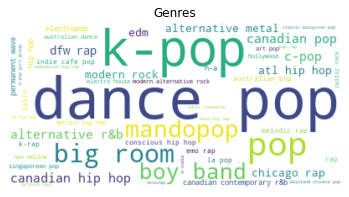

In [33]:
# wordcloud of genres

from wordcloud import WordCloud

def gen_wordcloud(data, title):
    wc = WordCloud(background_color="white", max_words=50).generate_from_frequencies(data)
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

d = {genre: count for genre, count in genre_count_df.values}

gen_wordcloud(d, 'Genres')

We observe an excessively large number of genres (185 genres across 3623 songs). Default genre labels are too specific, thus, we use the remapped genres provided by the dataset.

<AxesSubplot:title={'center':'Counts of songs by Genre (total=1604)'}, xlabel='genre', ylabel='count'>

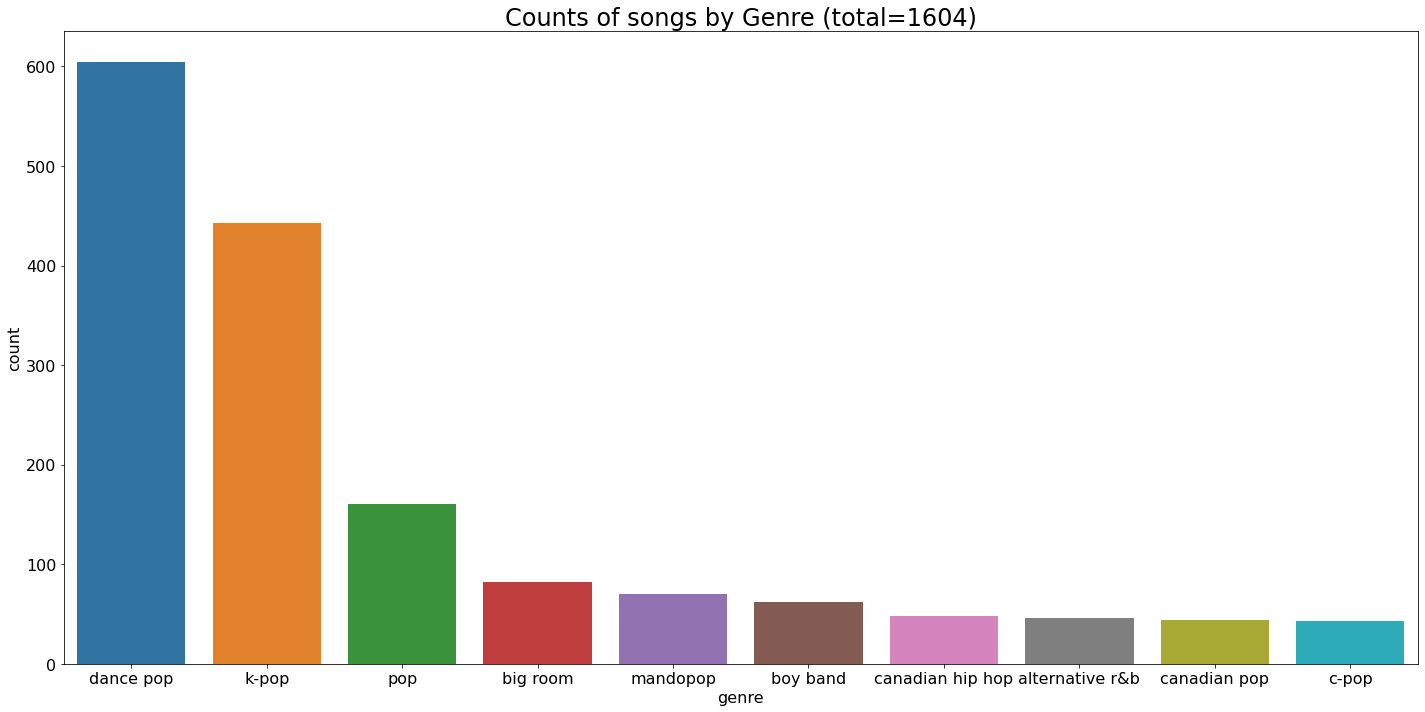

In [34]:
# genre count plot

genre_count_df = genre_count_df.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(20, 10))
plt.title(f"Counts of songs by Genre (total={genre_count_df['count'].sum()})", fontsize=24)
plt.xlabel('genre', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
sns.barplot(x='genre', y='count', data=genre_count_df)

In [35]:
# remove songs without genre
sg_songs_df = sg_songs_df[sg_songs_df['genre_new']!='else']
sg_songs_df.shape

(2549, 26)

In [36]:
# remap genres
og_genre_keywords = '|'.join(['chinese', 'mandopop', 'c-', 'canto', 'malay', 'kapak', 'dangdut'])

sg_songs_df['genre_new'] = np.where(
    sg_songs_df['genre'].str.contains(og_genre_keywords),
    sg_songs_df['genre'], sg_songs_df['genre_new'])

sg_songs_df.genre_new.value_counts()

pop                      1033
k-pop                     454
hip hop                   191
rap                       166
house                     108
r&b/soul                   94
dance/electronic           79
mandopop                   70
rock                       67
indie                      65
boy band                   62
c-pop                      43
metal                      33
latin                      19
classic malaysian pop      11
mainland chinese pop       11
country                     7
malaysian pop               7
chinese indie               6
chinese viral pop           4
malay rap                   4
singaporean mandopop        2
chinese r&b                 2
funk                        2
trap                        2
malaysian mandopop          1
malaysian indie             1
chinese hip hop             1
rock kapak                  1
jazz                        1
reggaeton                   1
cantopop                    1
Name: genre_new, dtype: int64

In [37]:
# remap c-pop

chinese_pop_keywords = '|'.join(['chinese pop', 'chinese viral pop', 'c-pop', 'mandopop', 'cantopop'])

sg_songs_df['genre_new'] = np.where(
    sg_songs_df['genre_new'].str.contains(chinese_pop_keywords),
    'mandopop', sg_songs_df['genre_new'])
sg_songs_df.genre_new.value_counts().shape

(26,)

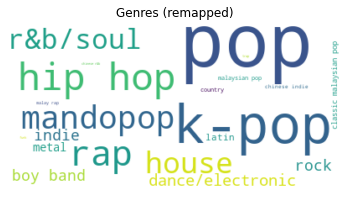

In [38]:
# wordcloud of remapped genres

sg_songs_df = sg_songs_df.drop(columns='genre').rename(columns={'genre_new':'genre'})

genre_rmp_count_df = sg_songs_df.genre.value_counts().reset_index().rename(columns={'index':'genre', 'genre':'count'})
d = {genre: count for genre, count in genre_rmp_count_df.values}

gen_wordcloud(d, 'Genres (remapped)')

genre_rmp_count_df.head(10).to_csv('Data/vis/raw_genre_counts.csv', index=False)

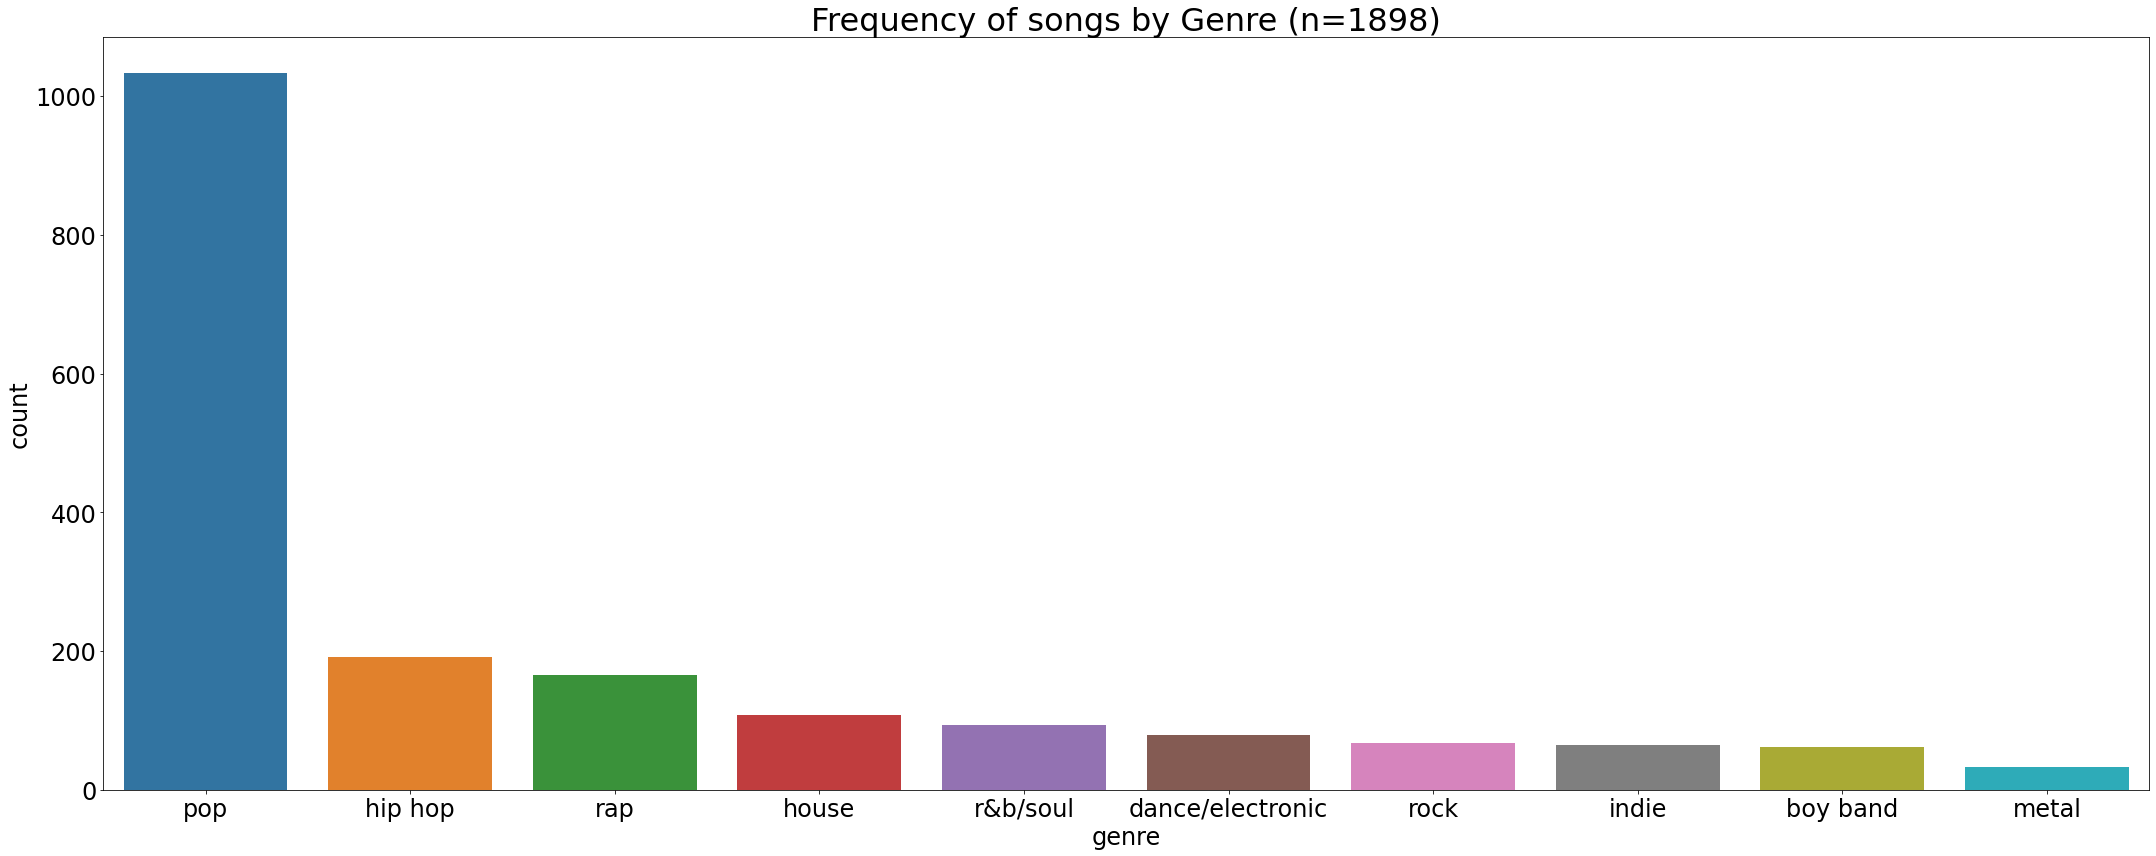

In [39]:
# bar plot of top 10 non-foreign genres

exclude_genres = ['mandopop', 'k-pop']
genre_rmp_count_df = genre_rmp_count_df[~genre_rmp_count_df['genre'].isin(exclude_genres)]
final_genre_count_df = genre_rmp_count_df.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(30, 12))
plt.title(f"Frequency of songs by Genre (n={final_genre_count_df['count'].sum()})",
             fontsize=32)

plt.xlabel('genre', fontsize=24)
plt.ylabel('frequency', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.tight_layout()

sns.barplot(x='genre', y='count', data=final_genre_count_df)
final_genre_count_df.to_csv('Data/vis/final_genre_counts.csv', index=False)

In [40]:
final_songs_df = sg_songs_df[sg_songs_df['genre'].isin(final_genre_count_df['genre'])]
final_songs_df.genre.value_counts()

popularity  artist_followers  explicit  danceability       energy  \
count   1898.000000      1.898000e+03    1898.0   1898.000000  1898.000000   
mean    4331.242387      1.235788e+07       0.0      0.655042     0.629224   
std     8255.819364      1.327517e+07       0.0      0.134396     0.160812   
min        0.800000      2.690000e+02       0.0      0.209000     0.096400   
25%      110.800000      2.394814e+06       0.0      0.572250     0.527000   
50%      684.700000      6.734577e+06       0.0      0.665000     0.638000   
75%     4236.712500      1.843991e+07       0.0      0.746000     0.743000   
max    53812.700000      5.257172e+07       0.0      0.968000     0.980000   

               key     loudness         mode  speechiness  acousticness  \
count  1898.000000  1898.000000  1898.000000  1898.000000   1898.000000   
mean      5.161749    -6.222938     0.610643     0.086384      0.220147   
std       3.655380     2.044527     0.487733     0.072486      0.240161   
min       0.000000   -14.104000     0.000000     0.023300      0.000002   
25%       1.000000    -7.355250     0.000000     0.039400      0.035450   
50%       5.000000    -5.948000     1.000000     0.056800      0.127000   
75%       8.000000    -4.842000     1.000000     0.100750      0.331000   
max      11.000000     0.175000     1.000000     0.357000      0.983000   

       instrumentalness     liveness      valence        tempo    duration_ms  \
count       1898.000000  1898.000000  1898.000000  1898.000000    1898.000000   
mean           0.003434     0.162558     0.454052   118.716062  205254.336670   
std            0.019376     0.103130     0.209546    27.305551   35151.584596   
min            0.000000     0.021500     0.037000    53.894000   85586.000000   
25%            0.000000     0.094800     0.289000    97.984250  183220.750000   
50%            0.000000     0.122000     0.446500   116.980000  203716.000000   
75%            0.000021     0.199000     0.605000   137.847750  224894.000000   
max            0.274000     0.582000     0.977000   202.103000  332301.000000   

       time_signature  days_since_release  top50_dummy  
count          1898.0         1898.000000  1898.000000  
mean              4.0         1099.899368     0.281349  
std               0.0         1172.552169     0.449776  
min               4.0           15.000000     0.000000  
25%               4.0          463.000000     0.000000  
50%               4.0          897.000000     0.000000  
75%               4.0         1272.000000     1.000000  
max               4.0         8344.000000     1.000000

In [41]:
# write to csv 
final_songs_df.describe()
final_songs_df.to_csv('Data/spotify_sg_1.csv', index=False, encoding='utf_8_sig')